# Análisis Exploratorio de Datos (EDA)

Se importan las librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de Datos

In [3]:
data=pd.read_csv('ts_data.csv') 
data

,Nombre,Album,Fecha de lanzamineto,Numero de pista,Acustica,Bailabilida,Energía,Instrumentalidad,Vivacidad,Sonoridad,Letra,Tempo,Valencia,Popularidad,Duracion (min)
0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,0.204000,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,74,3.373250
1,Maroon,Midnights (3am Edition),2022-10-22,2,0.059300,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,74,3.637833
2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,0.133000,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,75,3.344833
3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,0.735000,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,72,4.268733
4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,0.416000,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,74,3.236767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,Mary's Song (Oh My My My) - Instrumental w/ BG...,Taylor Swift Karaoke,2006-10-24,10,0.000081,0.475,0.529,0.562000,0.1460,-10.802,0.0317,151.000,0.3010,7,3.603767
1261,Our Song - Instrumental w/ BG vocals,Taylor Swift Karaoke,2006-10-24,11,0.032600,0.528,0.484,0.001650,0.1400,-9.266,0.0316,178.299,0.5850,10,3.405100
1262,I'm Only Me When I'm With You - Instrumental w...,Taylor Swift Karaoke,2006-10-24,12,0.000053,0.541,0.796,0.820000,0.3260,-8.833,0.0306,144.004,0.8470,7,3.723100
1263,Invisible - Instrumental w/ BG vocals,Taylor Swift Karaoke,2006-10-24,13,0.259000,0.575,0.279,0.572000,0.0941,-12.066,0.0286,96.007,0.1180,7,3.441333


In [33]:
data.describe()

,Numero de pista,Acustica,Bailabilida,Energía,Instrumentalidad,Vivacidad,Sonoridad,Letra,Tempo,Valencia,Popularidad,Duracion (min)
count,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000
mean,10.536759,0.321938,0.593117,0.563992,0.090735,0.162244,-7.911692,0.113597,120.876979,0.414598,36.037154,3.839694
std,7.245936,0.342390,0.111157,0.201305,0.235631,0.121155,3.184218,0.232660,30.248042,0.203684,22.284468,0.989820
min,1.000000,0.000025,0.175000,0.063900,0.000000,0.029100,-17.932000,0.023100,47.607000,0.037400,0.000000,0.696150
25%,5.000000,0.020200,0.529000,0.398000,0.000000,0.099600,-10.147000,0.030200,95.997000,0.236000,17.000000,3.483100
50%,10.000000,0.151000,0.599000,0.579000,0.000005,0.119000,-7.369000,0.036300,118.984000,0.412000,36.000000,3.893767
75%,14.000000,0.686000,0.662000,0.729000,0.000898,0.178000,-5.572000,0.055300,141.950000,0.551000,55.000000,4.267550
max,46.000000,0.983000,0.897000,0.950000,0.918000,0.931000,-1.953000,0.957000,208.918000,0.966000,91.000000,10.217100


Cambio de tipo de dato 

In [4]:
data.dtypes

Nombre                   object
Album                    object
Fecha de lanzamineto     object
Numero de pista           int64
Acustica                float64
Bailabilida             float64
Energía                 float64
Instrumentalidad        float64
Vivacidad               float64
Sonoridad               float64
Letra                   float64
Tempo                   float64
Valencia                float64
Popularidad               int64
Duracion (min)          float64
dtype: object

In [35]:
data['Fecha de lanzamineto'] = pd.to_datetime(data['Fecha de lanzamineto'])
data['Nombre']=data['Nombre'].astype('string')
data['Album']=data['Album'].astype('string')


# Filtro Songs & Albums

In [5]:
ts_data= data[
    (~data['Nombre'].str.contains('Karaoke Version'))&
    (~data['Nombre'].str.contains('Voice Memo'))& 
    (~data['Nombre'].str.contains('Acoustic'))&
    (~data['Nombre'].str.contains('Radio'))&
    (~data['Album'].str.contains('Karaoke'))&
    (~data['Album'].str.contains('Tour'))&
    (~data['Album'].str.contains('Radio'))&
    (~data['Album'].str.contains('studio'))&
    (~data['Album'].str.contains('Live'))&
    (~data['Album'].str.contains('International'))&
    (~data['Album'].str.contains('Japanese'))&
    (~data['Album'].str.contains('US'))]

# Analisis de las variables de las canciones

In [6]:
taylor_data = ts_data.sort_values('Popularidad', ascending = False)[['Nombre', 'Album',
       'Acustica', 'Bailabilida', 'Energía', 'Instrumentalidad', 'Vivacidad',
       'Sonoridad', 'Letra', 'Tempo', 'Valencia', 'Popularidad']]

In [38]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas_profiling
from pandas_profiling import ProfileReport

C:\Users\USUARIO 2021\AppData\Local\Temp\ipykernel_4044\671441926.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [40]:
profile = ProfileReport(taylor_data, title="Dataset Analysis", explorative=True)
profile.to_file("deposit-report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Analisis de las variables de las 10 canciones más populares

In [7]:
data.columns

Index(['Nombre', 'Album', 'Fecha de lanzamineto', 'Numero de pista',
       'Acustica', 'Bailabilida', 'Energía', 'Instrumentalidad', 'Vivacidad',
       'Sonoridad', 'Letra', 'Tempo', 'Valencia', 'Popularidad',
       'Duracion (min)'],
      dtype='object')

In [10]:
tay_data = ts_data.sort_values('Popularidad', ascending = False)[['Nombre', 'Album',
       'Acustica', 'Bailabilida', 'Energía', 'Instrumentalidad', 'Vivacidad',
       'Sonoridad', 'Letra', 'Tempo', 'Valencia', 'Popularidad']].head(10)
tay_data

,Nombre,Album,Acustica,Bailabilida,Energía,Instrumentalidad,Vivacidad,Sonoridad,Letra,Tempo,Valencia,Popularidad
42,Anti-Hero,Midnights,0.130,0.637,0.643,0.000002,0.1420,-6.571,0.0519,97.008,0.5330,91
40,Lavender Haze,Midnights,0.258,0.733,0.436,0.000573,0.1570,-10.489,0.0800,96.985,0.0976,85
401,Don’t Blame Me,reputation,0.106,0.615,0.534,0.000018,0.0607,-6.719,0.0386,135.917,0.1930,83
45,Midnight Rain,Midnights,0.690,0.643,0.363,0.000052,0.1150,-11.738,0.0767,139.865,0.2300,82
334,cardigan,folklore,0.537,0.613,0.581,0.000345,0.2500,-8.588,0.0424,130.033,0.5510,82
670,Blank Space,1989 (Deluxe),0.103,0.760,0.703,0.000000,0.0913,-5.412,0.0540,95.997,0.5700,82
367,Lover,Lover,0.492,0.359,0.543,0.000016,0.1180,-7.582,0.0919,68.534,0.4530,81
366,Cruel Summer,Lover,0.117,0.552,0.702,0.000021,0.1050,-5.707,0.1570,169.994,0.5640,80
43,Snow On The Beach (feat. Lana Del Rey),Midnights,0.690,0.663,0.319,0.000993,0.1170,-13.481,0.0375,109.957,0.1930,79
44,"You're On Your Own, Kid",Midnights,0.401,0.696,0.396,0.000005,0.1250,-10.289,0.0656,120.041,0.3800,79


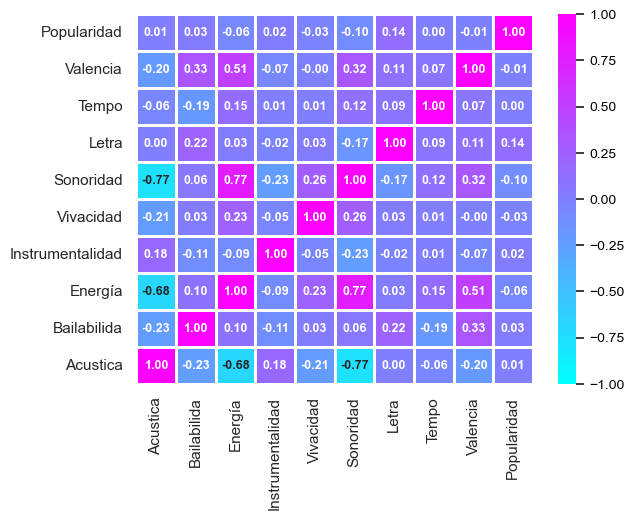

In [50]:
ax =sns.heatmap(tay_data.corr(), 
                cmap="cool", 
                vmin=-1, 
                vmax=1, 
                annot=True, 
                fmt="0.2f", 
                linewidths=1, 
                annot_kws={'fontsize': 9,'fontweight': 'bold',})
sns.set(rc = {'axes.facecolor':'black','figure.facecolor':'white'}, font_scale=1)
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.set(facecolor='white')
ax.figure.axes[1].tick_params(axis="y", labelsize=10, labelcolor='black')
plt.savefig('Correlacion Variables.png')

plt.show()

In [51]:
tays_data = ts_data.sort_values('Popularidad', ascending = False)[['Nombre', 'Album',
       'Acustica', 'Bailabilida', 'Energía', 'Instrumentalidad', 'Vivacidad',
       'Sonoridad', 'Letra', 'Tempo', 'Valencia', 'Popularidad']]
tays_data

,Nombre,Album,Acustica,Bailabilida,Energía,Instrumentalidad,Vivacidad,Sonoridad,Letra,Tempo,Valencia,Popularidad
42,Anti-Hero,Midnights,0.13000,0.637,0.643,0.000002,0.1420,-6.571,0.0519,97.008,0.5330,91
40,Lavender Haze,Midnights,0.25800,0.733,0.436,0.000573,0.1570,-10.489,0.0800,96.985,0.0976,85
401,Don’t Blame Me,reputation,0.10600,0.615,0.534,0.000018,0.0607,-6.719,0.0386,135.917,0.1930,83
45,Midnight Rain,Midnights,0.69000,0.643,0.363,0.000052,0.1150,-11.738,0.0767,139.865,0.2300,82
334,cardigan,folklore,0.53700,0.613,0.581,0.000345,0.2500,-8.588,0.0424,130.033,0.5510,82
...,...,...,...,...,...,...,...,...,...,...,...,...
649,Wildest Dreams,1989 (Deluxe Edition),0.07020,0.554,0.666,0.005930,0.1060,-7.414,0.0747,140.056,0.4720,5
650,How You Get The Girl,1989 (Deluxe Edition),0.00461,0.764,0.660,0.004770,0.0915,-6.136,0.0494,119.988,0.5240,5
652,I Know Places,1989 (Deluxe Edition),0.23100,0.596,0.763,0.000000,0.2000,-4.990,0.0661,159.958,0.5070,5
653,Clean,1989 (Deluxe Edition),0.24100,0.810,0.379,0.000000,0.1130,-7.771,0.0349,103.981,0.2200,5


# Correlación Popularidad

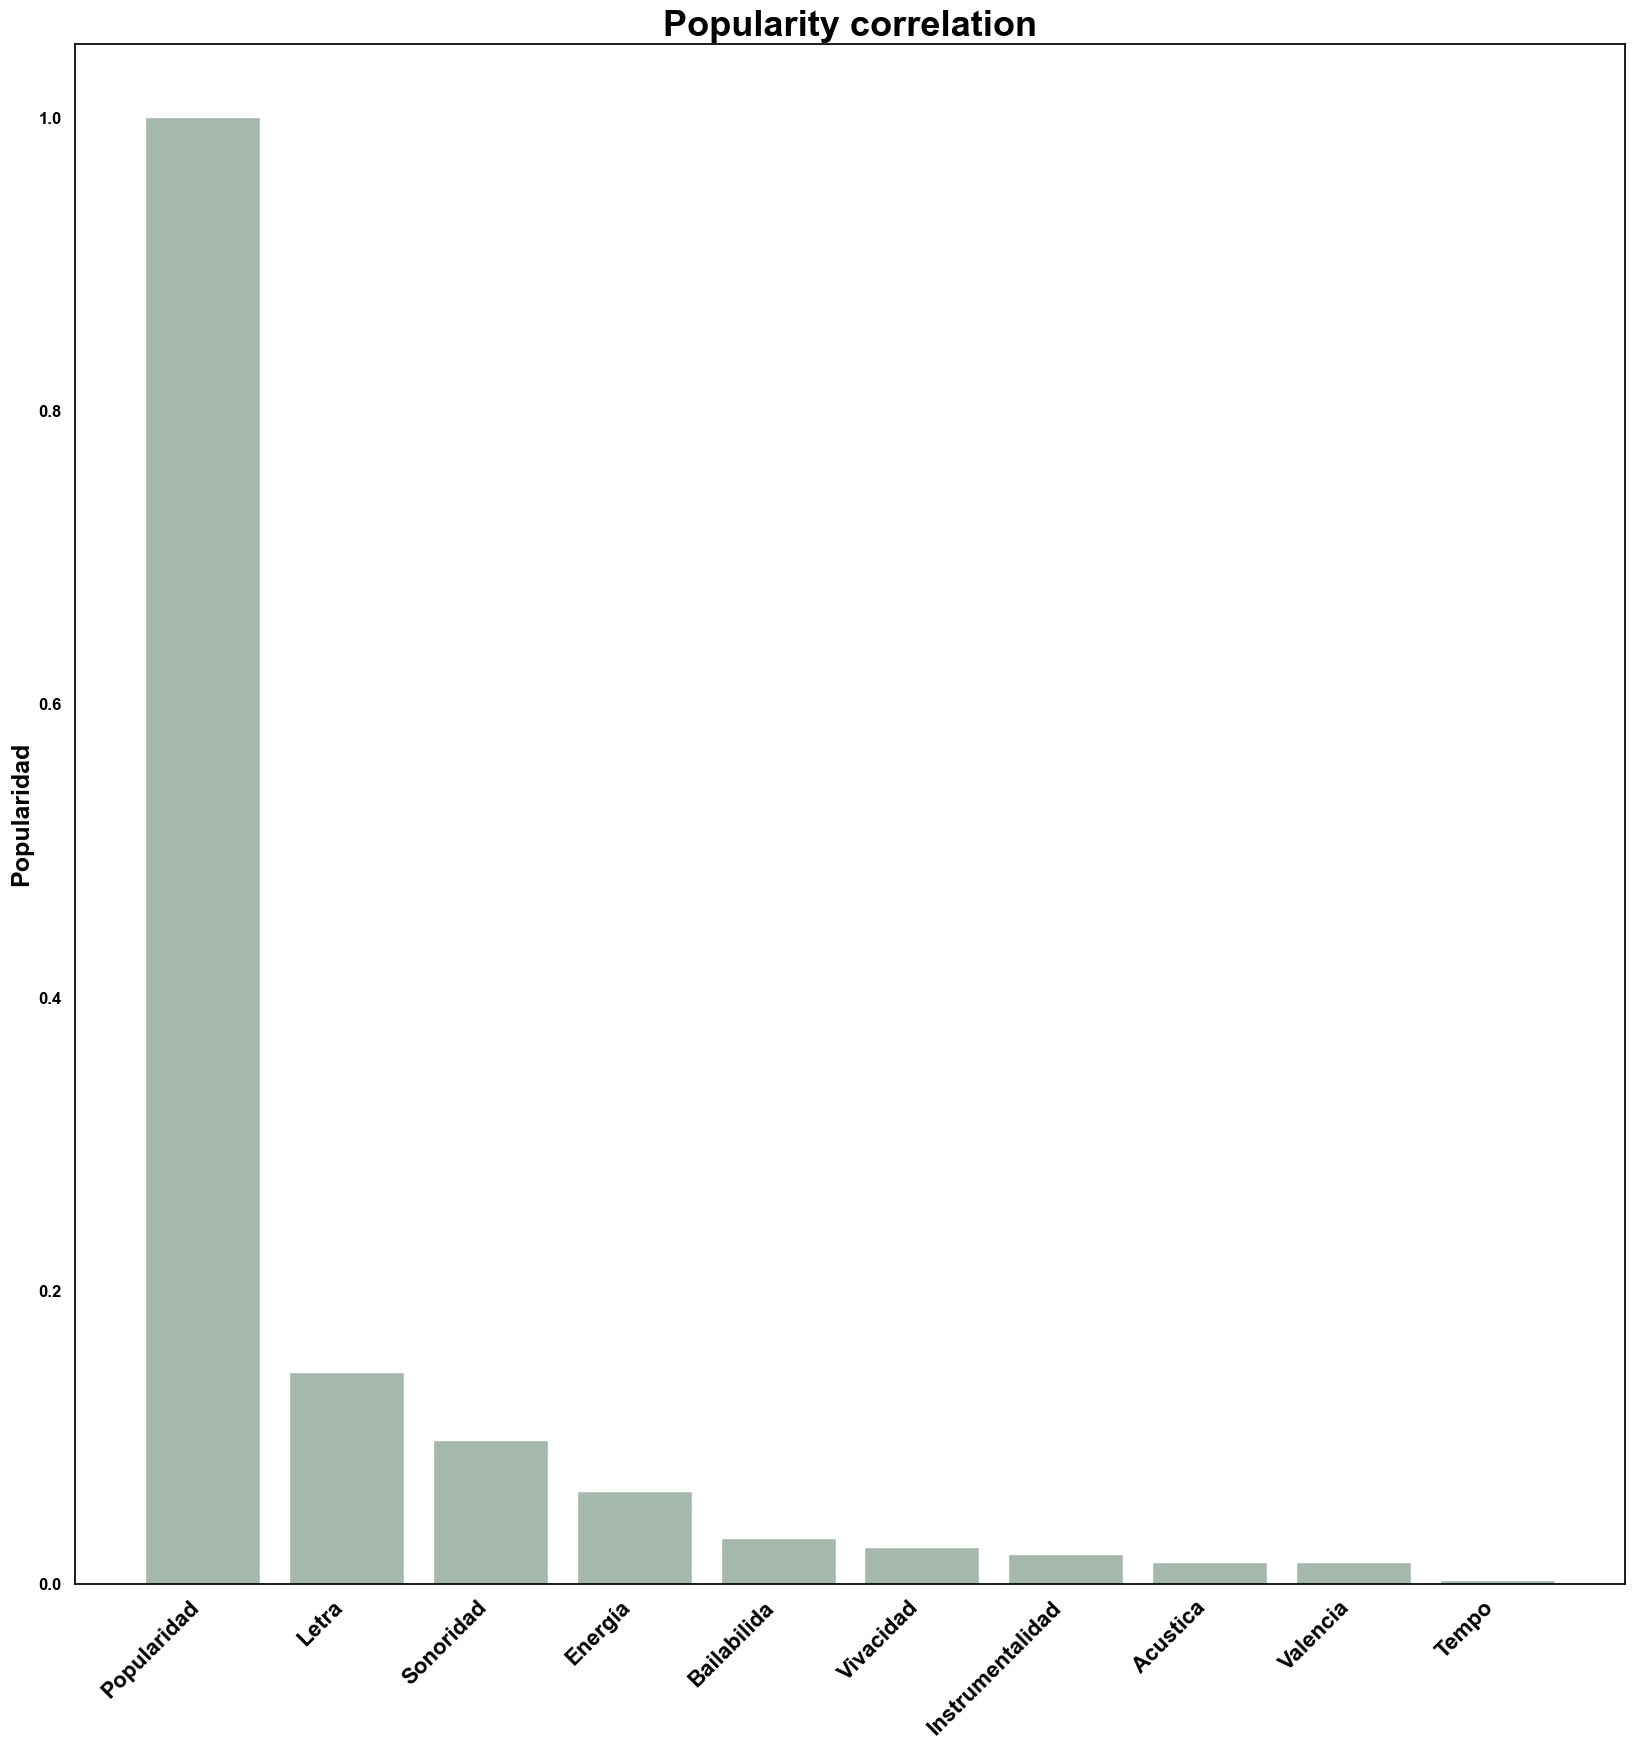

In [52]:
corr = abs(tays_data.corr()['Popularidad']).sort_values(ascending=False)

x = np.arange(corr.size)
plt.figure(figsize=(20,20), facecolor='white')
ax = plt.axes() 
ax.set_title("Popularity correlation", size = 26, color='black', weight='bold', x=0.5, y=1)
ax.set_ylabel("Popularidad", size = 18, color='black', weight='bold')
ax.set_facecolor("white")
ax.grid(False)
plt.bar(x, corr, color='#A4B8AC')
plt.xticks(x, corr.keys())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", color='black', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), color='black', size=12, weight='bold')
plt.setp(ax.spines.values(), color='black')
plt.savefig('popularity_corr.png')
plt.show()

Se aprecia que las variables con las que tiene una mayor relacion la Pop

# Top Songs

In [23]:
top = ts_data.sort_values('Popularidad', ascending = False)[['Popularidad', 'Nombre','Album','Vivacidad']].head(20)
top.index = np.arange(1, len(top)+1)
top

,Popularidad,Nombre,Album,Vivacidad
1,91,Anti-Hero,Midnights,0.1420
2,85,Lavender Haze,Midnights,0.1570
3,83,Don’t Blame Me,reputation,0.0607
4,82,Midnight Rain,Midnights,0.1150
5,82,cardigan,folklore,0.2500
6,82,Blank Space,1989 (Deluxe),0.0913
7,81,Lover,Lover,0.1180
8,80,Cruel Summer,Lover,0.1050
9,79,Snow On The Beach (feat. Lana Del Rey),Midnights,0.1170
10,79,"You're On Your Own, Kid",Midnights,0.1250


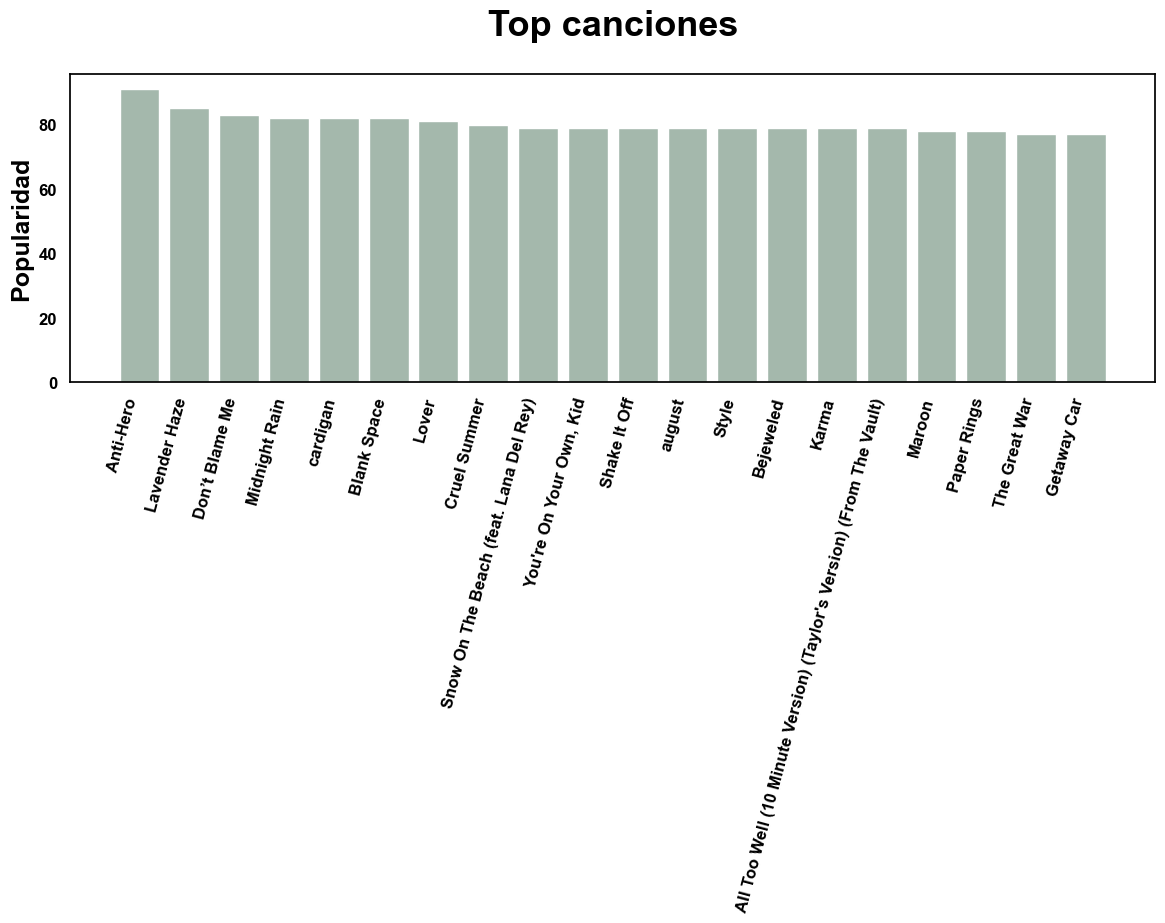

In [62]:
plt.figure(figsize=(14,4), facecolor='white') 
ax = plt.axes() 
ax.bar(top['Nombre'], top['Popularidad'], color='#A4B8AC')
ax.set_ylabel("Popularidad", size = 18, color='black', weight='bold')
ax.set_title("Top canciones", size = 26, color='black', weight='bold', x=0.5, y=1.1)
ax.set_facecolor("white")
ax.grid(False)
plt.setp(ax.get_xticklabels(), rotation=75, ha="right", color='black', size=12, weight='bold')
plt.setp(ax.get_yticklabels(), color='black', size=12, weight='bold')
plt.setp(ax.spines.values(), color='black')
plt.savefig('Top Songs.png')
plt.show()

# Top Albums


In [58]:
top_albums = ts_data.sort_values('Popularidad', ascending = False)[['Album','Popularidad',]]
top_albums.index = np.arange(1, len(top_albums)+1)
top_albums

,Album,Popularidad
1,Midnights,91
2,Midnights,85
3,reputation,83
4,Midnights,82
5,folklore,82
...,...,...
677,1989 (Deluxe Edition),5
678,1989 (Deluxe Edition),5
679,1989 (Deluxe Edition),5
680,1989 (Deluxe Edition),5


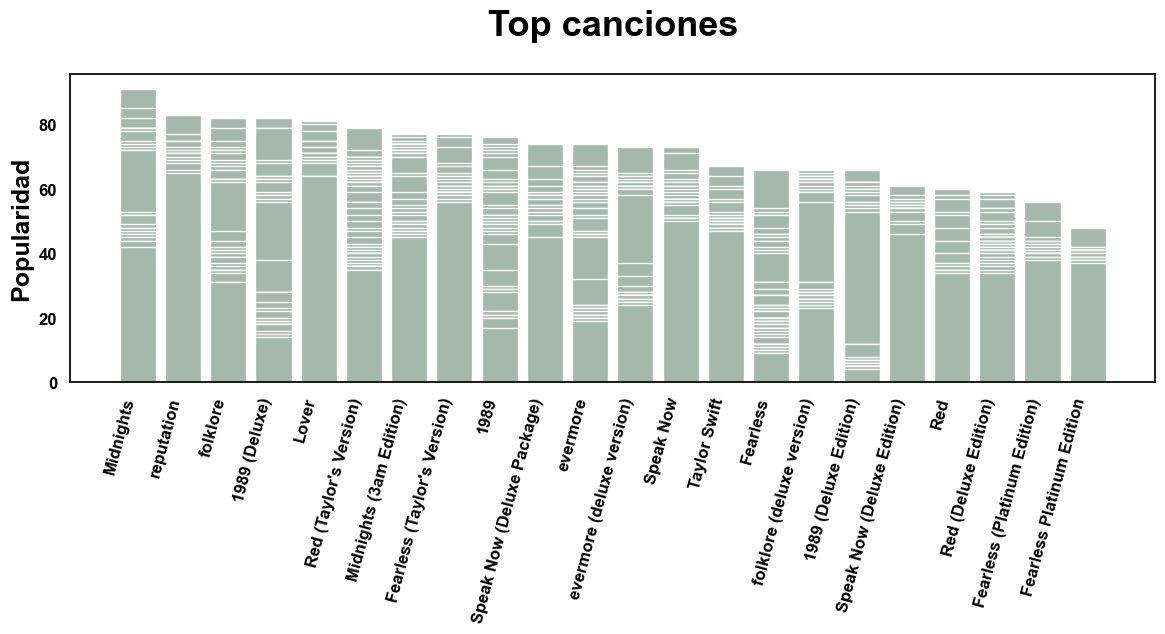

In [61]:
plt.figure(figsize=(14,4), facecolor='white') 
ax = plt.axes() 
ax.bar(top_albums['Album'], top_albums['Popularidad'], color='#A4B8AC')
ax.set_ylabel("Popularidad", size = 18, color='black', weight='bold')
ax.set_title("Top canciones", size = 26, color='black', weight='bold', x=0.5, y=1.1)
ax.set_facecolor("white")
ax.grid(False)
plt.setp(ax.get_xticklabels(), rotation=75, ha="right", color='black', size=12, weight='bold')
plt.setp(ax.get_yticklabels(), color='black', size=12, weight='bold')
plt.setp(ax.spines.values(), color='black')
plt.savefig('Top Albums.png')
plt.show()

# Top Unpopular Songs

In [25]:
unpopular = ts_data.sort_values('Popularidad', ascending = True)[['Popularidad', 'Nombre','Album','Vivacidad']].head(20)
#unpopular.index = np.arange(1, len(unpopular)+1)
unpopular

,Popularidad,Nombre,Album,Vivacidad
651,4,This Love,1989 (Deluxe Edition),0.1010
641,5,Welcome To New York,1989 (Deluxe Edition),0.3040
649,5,Wildest Dreams,1989 (Deluxe Edition),0.1060
650,5,How You Get The Girl,1989 (Deluxe Edition),0.0915
652,5,I Know Places,1989 (Deluxe Edition),0.2000
653,5,Clean,1989 (Deluxe Edition),0.1130
647,6,I Wish You Would,1989 (Deluxe Edition),0.1090
646,6,Shake It Off,1989 (Deluxe Edition),0.1480
645,6,All You Had To Do Was Stay,1989 (Deluxe Edition),0.1050
644,7,Out Of The Woods,1989 (Deluxe Edition),0.3370


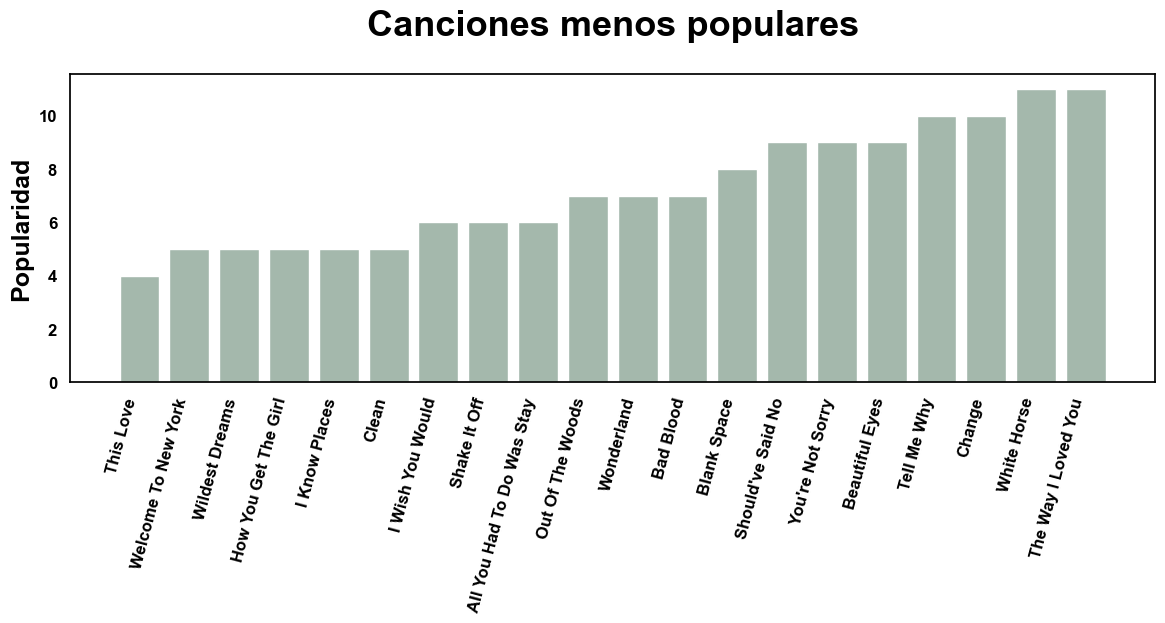

In [46]:
plt.figure(figsize=(14,4), facecolor='white') 
ax = plt.axes() 
ax.bar(unpopular['Nombre'], unpopular['Popularidad'], color='#A4B8AC')
ax.set_ylabel("Popularidad", size = 18, color='black', weight='bold')
ax.set_title("Canciones menos populares", size = 26, color='black', weight='bold', x=0.5, y=1.1)
ax.set_facecolor("white")
ax.grid(False)
plt.setp(ax.get_xticklabels(), rotation=75, ha="right", color='black', size=12, weight='bold')
plt.setp(ax.get_yticklabels(), color='black', size=12, weight='bold')
plt.setp(ax.spines.values(), color='black')
plt.savefig('Unpopular songs.png')
plt.show()